In [1]:
import h5py
import numpy as np
import rdrand
import matplotlib.pyplot as plt
plt.ioff()
r = rdrand.RdRandom(rdrand.RdSeedom())

In [2]:
grid_size = 10
grid_refinement = 5
modes = 3
nos = 40000
T_min = 1000.0
T_max = 2000.0
filename = "MAMLAS_test_gaussian_3_2d_40000.hdf5"

In [3]:
T_data = np.zeros((nos, grid_size*grid_refinement, grid_size*grid_refinement))
X = np.linspace(0, 1, grid_size*grid_refinement)
x, y = np.meshgrid(X, X)
max_T_data = 0.0

In [4]:
i = 0
cont_num = 0
while i < nos:
    peak_x_0 = r.uniform(0.1, 0.9)
    peak_y_0 = r.uniform(0.1, 0.9)

    peak_variance = r.uniform(0.15, 0.45)
    T_data[i] = T_data[i] + \
        r.uniform(0.3, 1.0)*np.exp(-((x-peak_x_0)**2 +
                                     (y-peak_y_0)**2)/(2*peak_variance**2))

    for j in range(modes-1):
        peak_r = r.uniform(peak_variance**0.5, 1)
        peak_dir = r.uniform(0, 2*np.pi)
        peak_x = peak_x_0+peak_r*np.cos(peak_dir)
        peak_y = peak_y_0+peak_r*np.sin(peak_dir)
        if peak_x >= 0.9:
            peak_x -= 0.8
        elif peak_x <= 0.1:
            peak_x = 0.9-np.abs(0.1-peak_x)
        if peak_y >= 0.9:
            peak_y -= 0.8
        elif peak_y <= 0.1:
            peak_y = 0.9-np.abs(0.1-peak_y)
        peak_variance = r.uniform(0.15, 0.45)
        T_data[i] = T_data[i] + \
            r.uniform(0, 1)*np.exp(-((x-peak_x)**2 +
                                     (y-peak_y)**2)/(2*peak_variance**2))
    if np.max(T_data[i]) > 1:
        T_data[i] = 0
        continue

    max_T_data = max(max_T_data, np.max(T_data[i]))
    i = i+1

In [5]:
print(np.sum([np.max(T_data[i]) > 1 for i in range(nos)]))

0


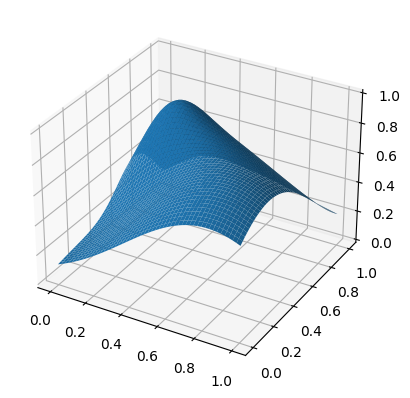

0.9999930774909978


In [6]:
x,y=np.meshgrid(np.linspace(0,1,50),np.linspace(0,1,50))
fig=plt.figure()
ax=fig.add_subplot(projection="3d")
ax.plot_surface(x,y,T_data[r.randint(0,nos-1)])
ax.set_zlim(0,1)
plt.show()

# %%

print(max_T_data)

In [7]:
T_data.shape

(40000, 50, 50)